In [8]:
import sympy as sp
from SymbolsHolder import make_derivative_symbol
from qbee import polynomialize, quadratic_linearize
from visuzalization.vizualization import visualize

sp.init_printing()

x, y, z = sp.symbols('x, y, z')
dot_x, dot_y, dot_z = list(map(make_derivative_symbol, [x, y, z]))


### Simple systems

In [2]:
system = [
    sp.Eq(dot_x, x**3)
]

system

In [3]:
quadratic_linearize(system)

In [4]:
system = \
    [
        sp.Eq(dot_x, x**3),
        sp.Eq(dot_y, x * z**2),
        sp.Eq(dot_z, z)
    ]

system

In [5]:
quadratic_linearize(system)

# Example 6.3.5 from [article](https://www2.eecs.berkeley.edu/Pubs/TechRpts/2012/EECS-2012-217.pdf)

There are several methods to quadratic-linearize a system. We propose 'sqrt-count-first'
as the most successful for now. 

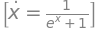

In [6]:
system = \
    [
        sp.Eq(dot_x, 1 / (1 + sp.exp(x)))
    ]

system

In [7]:
quadratic_linearize(system, debug='info', log_file='graph_log.csv')

----------------------------------------------------------------------------------------------------
Equations added: 2
Last replacement: Eq(y_{1}, 1/(y_{0} + 1))
----------------------------------------------------------------------------------------------------
Equations added: 3
Last replacement: Eq(y_{2}, y_{1}**2)
----------------------------------------------------------------------------------------------------
Equations added: 4
Last replacement: Eq(y_{3}, y_{2}**2)
----------------------------------------------------------------------------------------------------
Equations added: 5
Last replacement: Eq(y_{4}, y_{0}*y_{2})
----------------------------------------------------------------------------------------------------


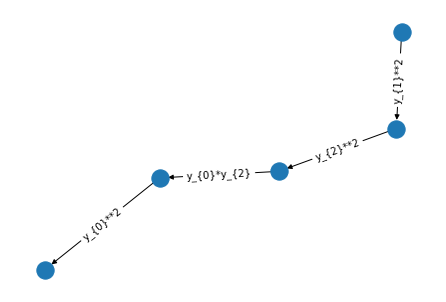

In [9]:
visualize('graph_log.csv')